<img src='for_markdown/8.png'>

<img src='for_markdown/9.png'>

<img src='for_markdown/10.png'>

<img src='for_markdown/11.png'>

<img src='for_markdown/12.png'>

In [1]:
# 관련 모듈 부르기 및 시각화를 위한 셋팅
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 

#plt.rcParams['axes.unicode_minus'] = False
#path = 'C:/Windows/Fonts/malgun.ttf'
#font_name = mpl.font_manager.FontProperties(fname=path, size=50).get_name()
#print(font_name)

In [2]:
# 데이터 불러오기
root_dir = 'C:/kdev/pythonCode/day3/Data/'
os.chdir(root_dir)
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

id  zipcode      lat     long  bedrooms  bathrooms  floors  \
0  9106000005    98115  47.6747 -122.303         4       2.25     2.0   
1  5101400871    98115  47.6914 -122.308         2       1.75     1.0   
2  7923600250    98007  47.5951 -122.144         5       2.00     1.5   
3  4166600610    98023  47.3273 -122.370         3       2.00     1.0   
4  5057100110    98042  47.3584 -122.163         5       3.00     2.0   

   waterfront  grade  condition      date  sqft_living  sqft_lot  sqft_above  \
0           1      8          5  20150527         3750      5000        2440   
1           1      6          3  20150524         1390      6670         720   
2           1      7          3  20150515         1870      7344        1870   
3           1      7          4  20150514         1410     44866        1410   
4           1      9          3  20150514         3223      6371        3223   

   sqft_basement  yr_built  yr_renovated    price  
0           1310      1924             0  1310000  
1            670      1941             0   445500  
2              0      1960             0   450000  
3              0      1985             0   335000  
4              0      2014             0   479349

In [4]:
data.shape

(16383, 18)

<img src='for_markdown/13.png'>

In [5]:
data = data.drop(['id','zipcode'],axis=1)

In [6]:
data['date'].head(15)

0     20150527
1     20150524
2     20150515
3     20150514
4     20150514
5     20150514
6     20150514
7     20150514
8     20150514
9     20150514
10    20150514
11    20150514
12    20150514
13    20150514
14    20150513
Name: date, dtype: int64

In [8]:
year = []
for i in range(data.shape[0]):
    year.append(str(data.loc[i,'date'])[:4])
data['year'] = pd.Series(year)
year

['2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 

In [9]:
quarter = []
for i in range(data.shape[0]):    
    quarter.append(int(str(data.loc[i,'date'])[4:6])//4)
data['quarter'] = pd.Series(quarter)
quarter

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [10]:
data[['year','quarter']].head(15)

year  quarter
0   2015        1
1   2015        1
2   2015        1
3   2015        1
4   2015        1
5   2015        1
6   2015        1
7   2015        1
8   2015        1
9   2015        1
10  2015        1
11  2015        1
12  2015        1
13  2015        1
14  2015        1

<img src='for_markdown/14.png'>

In [11]:
data = pd.get_dummies(data,columns=['year','quarter'])
data = data.drop(['date'], axis=1)

In [12]:
data.columns

Index(['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'price', 'year_2014', 'year_2015',
       'quarter_0', 'quarter_1', 'quarter_2', 'quarter_3'],
      dtype='object')

In [13]:
data = data.drop(['year_2015','quarter_3'],axis=1)

In [14]:
data['yr_built'] = 2018-data['yr_built']

data.loc[data['yr_renovated'] == 0,'yr_renovated'] = 0
data.loc[data['yr_renovated'] != 0,'yr_renovated'] = 1

In [15]:
data = data[['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated','year_2014', 'quarter_0', 'quarter_1', 'quarter_2','price']]

In [16]:
data.head()

lat     long  bedrooms  bathrooms  floors  waterfront  grade  \
0  47.6747 -122.303         4       2.25     2.0           1      8   
1  47.6914 -122.308         2       1.75     1.0           1      6   
2  47.5951 -122.144         5       2.00     1.5           1      7   
3  47.3273 -122.370         3       2.00     1.0           1      7   
4  47.3584 -122.163         5       3.00     2.0           1      9   

   condition  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0          5         3750      5000        2440           1310        94   
1          3         1390      6670         720            670        77   
2          3         1870      7344        1870              0        58   
3          4         1410     44866        1410              0        33   
4          3         3223      6371        3223              0         4   

   yr_renovated  year_2014  quarter_0  quarter_1  quarter_2    price  
0             0          0          0          1          0  1310000  
1             0          0          0          1          0   445500  
2             0          0          0          1          0   450000  
3             0          0          0          1          0   335000  
4             0          0          0          1          0   479349

In [17]:
data.to_csv('preprocessed_kc_house_data2.csv')

<img src='for_markdown/15.png'>

In [18]:
X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=2017020558)

In [19]:

# 정규화 작업 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#fit과 정규화를 한번에 하는 함수 
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [23]:
X_train[:10]

array([[ 1.3531375 , -0.12916078, -1.50433555, -1.44130646,  0.02039686,
        -0.0864134 , -1.39222012,  2.50559348, -0.86755713, -0.21615971,
        -0.60777375, -0.65896668,  1.02178662, -0.2101408 ,  0.85637237,
        -0.57573924,  1.82013724, -0.86743587],
       [ 0.60372769, -1.32284228,  0.69712175, -0.46785375, -0.90051351,
        -0.0864134 ,  0.31072696,  2.50559348, -0.21907232, -0.21011511,
        -0.13391022, -0.20309819,  0.74856527, -0.2101408 , -1.16771633,
        -0.57573924,  1.82013724, -0.86743587],
       [ 0.56560991, -1.10126069,  0.69712175, -0.46785375,  0.94130724,
        -0.0864134 ,  0.31072696,  0.94293598, -0.16411598, -0.26344982,
         0.16984846, -0.65896668,  2.18297736, -0.2101408 ,  0.85637237,
        -0.57573924, -0.54940912,  1.15282298],
       [-0.17948468, -0.55088059, -1.50433555, -0.14336952, -0.90051351,
        -0.0864134 , -0.54074658, -0.61972151, -0.85656586, -0.14253559,
        -1.0087352 ,  0.11600974,  0.50949659, -0.210

In [24]:
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=None,
                               random_state=2017020558)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017020558, splitter='best')

In [25]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 796078.0709
- MSE (Test) : 34252503034.3674
- R square (Train)      : 1.0000
- R square (Test) : 0.7281


In [26]:
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=10,
                               random_state=2017020558)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017020558, splitter='best')

In [27]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 11018453878.9008
- MSE (Test) : 26022411651.5574
- R square (Train)      : 0.9198
- R square (Test) : 0.7934


In [28]:
imp = dt_reg.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

      variables importance
6         grade     0.3743
8   sqft_living   0.262731
0           lat   0.166132
5    waterfront  0.0632669
1          long  0.0573582
12     yr_built  0.0294837
10   sqft_above  0.0146176
9      sqft_lot  0.0114645


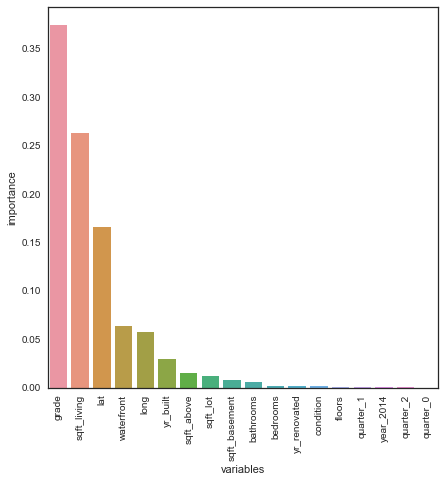

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

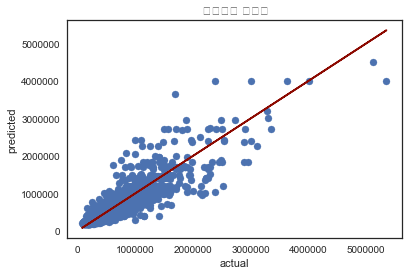

In [30]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(' 실제값과 예측값')
plt.show()